# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [3]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/retailmax.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

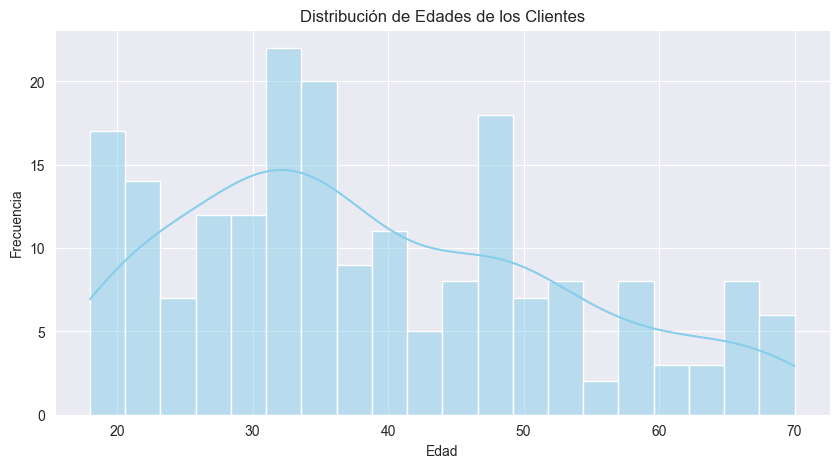

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

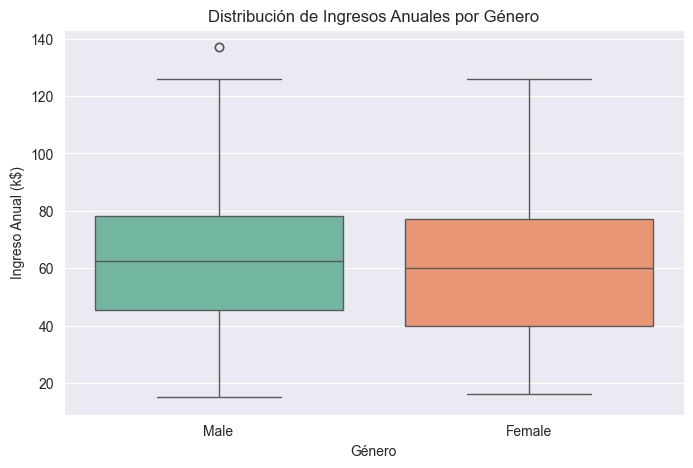

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)', palette='Set2')

plt.title('Distribución de Ingresos Anuales por Género')
plt.xlabel('Género')
plt.ylabel('Ingreso Anual (k$)')
plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

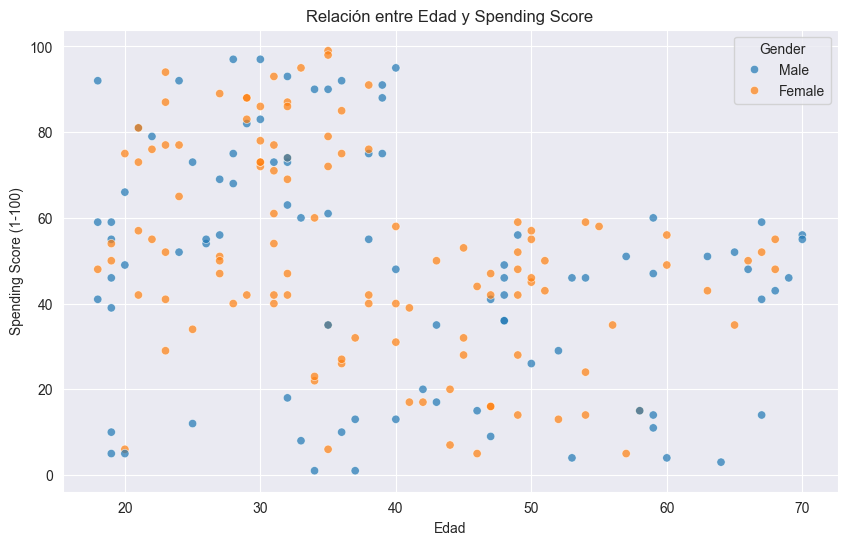

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender', alpha=0.7)

plt.title('Relación entre Edad y Spending Score')
plt.xlabel('Edad')
plt.ylabel('Spending Score (1-100)')
plt.show()
df.columns

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

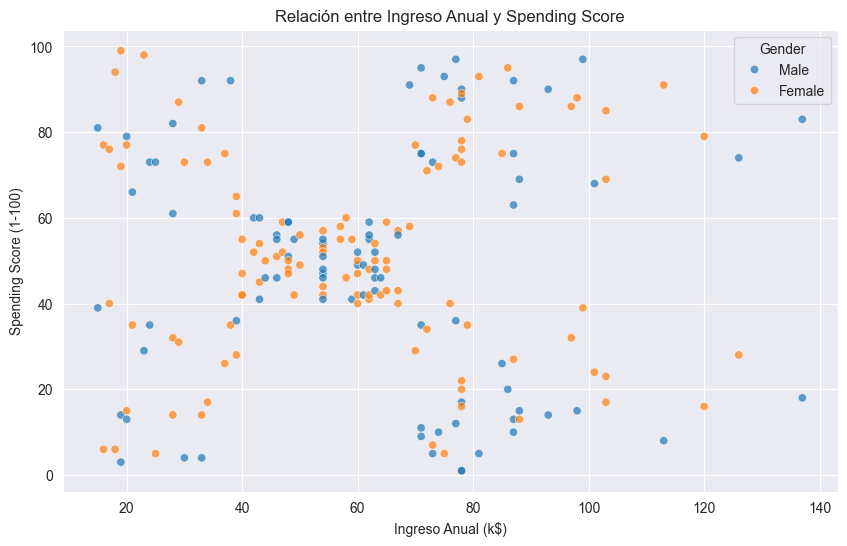

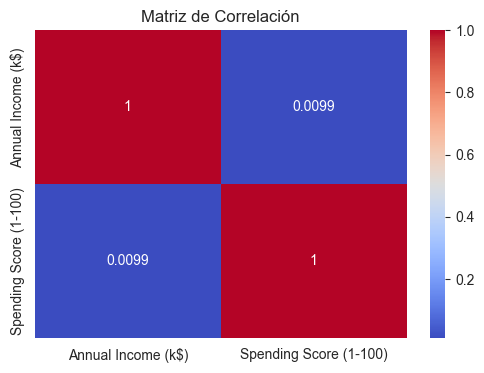

np.float64(0.009902848094037606)

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender',
    alpha=0.7
)

plt.title('Relación entre Ingreso Anual y Spending Score')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df[['Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

correlation = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
correlation


### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

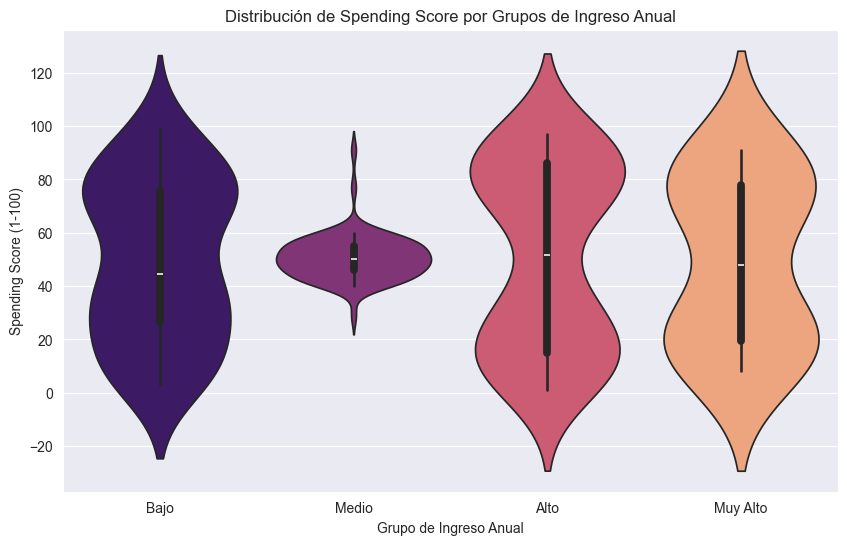

In [10]:
bins_income = [0, 40, 70, 100, 150]
labels_income = ['Bajo', 'Medio', 'Alto', 'Muy Alto']

df['IncomeGroup'] = pd.cut(df['Annual Income (k$)'], bins=bins_income, labels=labels_income)
df['IncomeGroup'].value_counts()
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='IncomeGroup', y='Spending Score (1-100)', palette='magma')

plt.title('Distribución de Spending Score por Grupos de Ingreso Anual')
plt.xlabel('Grupo de Ingreso Anual')
plt.ylabel('Spending Score (1-100)')
plt.show()


### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

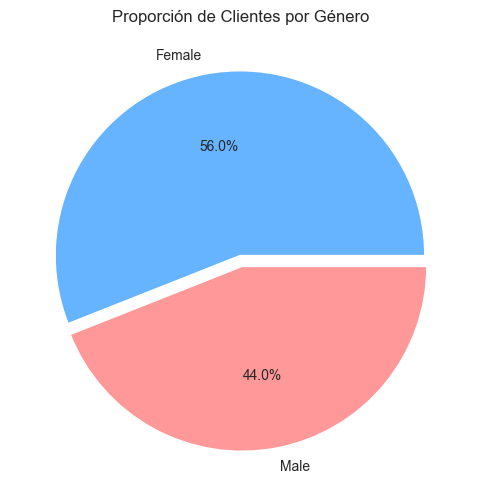

In [11]:
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff9999'],
    labels=['Female','Male'],
    explode=[0.03,0.03]
)

plt.title('Proporción de Clientes por Género')
plt.ylabel('')
plt.show()

### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

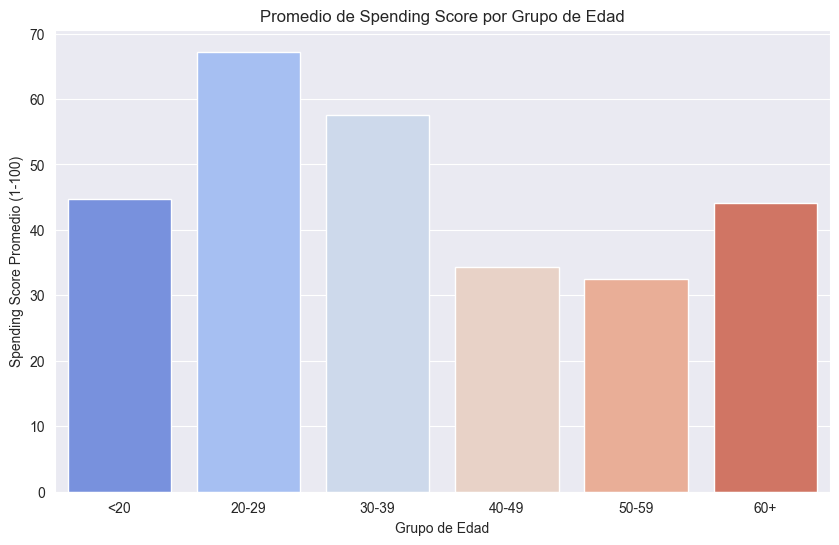

In [12]:
bins_age = [0, 20, 30, 40, 50, 60, 100]
labels_age = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)
df['AgeGroup'].value_counts()
age_spending_mean = df.groupby('AgeGroup')['Spending Score (1-100)'].mean()
age_spending_mean
plt.figure(figsize=(10,6))
sns.barplot(
    x=age_spending_mean.index,
    y=age_spending_mean.values,
    palette='coolwarm'
)

plt.title('Promedio de Spending Score por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Spending Score Promedio (1-100)')
plt.show()

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

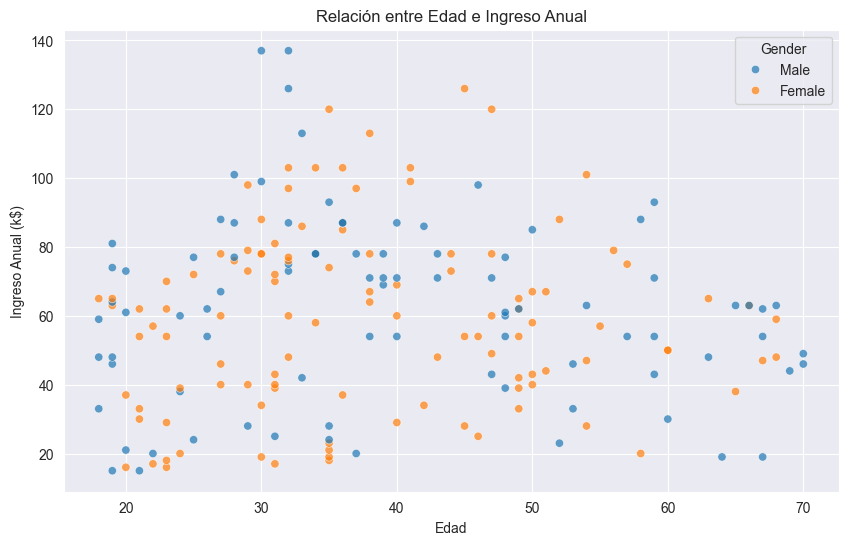

np.float64(-0.012398042736060138)

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Annual Income (k$)',
    hue='Gender',
    alpha=0.7
)

plt.title('Relación entre Edad e Ingreso Anual')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.show()
df['Age'].corr(df['Annual Income (k$)'])

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

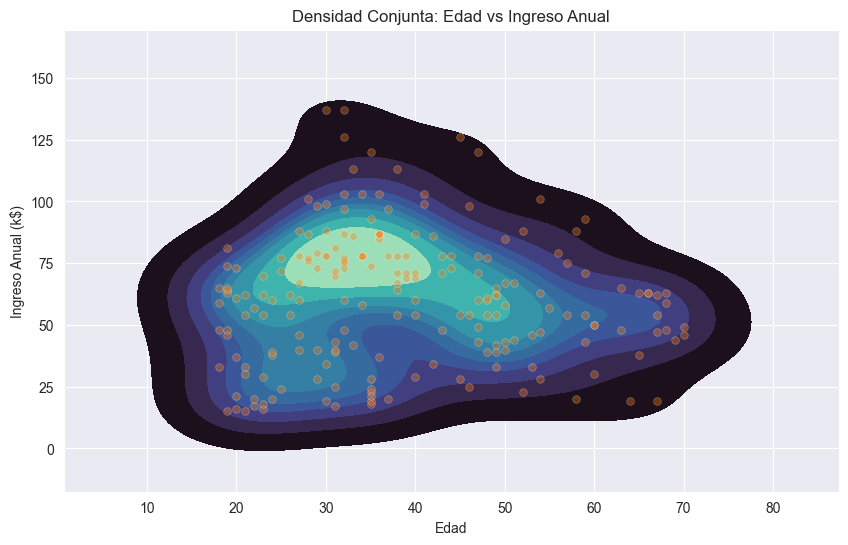

In [19]:
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=df,
    x='Age',
    y='Annual Income (k$)',
    fill=True,
    cmap='mako'
)

sns.scatterplot(
    data=df,
    x='Age',
    y='Annual Income (k$)',
    alpha=0.35,
    s=30
)

plt.title('Densidad Conjunta: Edad vs Ingreso Anual')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

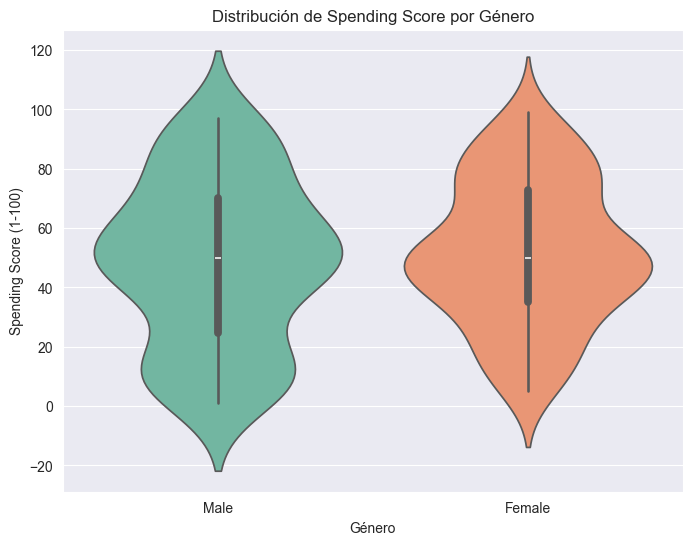

In [20]:
plt.figure(figsize=(8,6))
sns.violinplot(
    data=df,
    x='Gender',
    y='Spending Score (1-100)',
    palette='Set2'
)

plt.title('Distribución de Spending Score por Género')
plt.xlabel('Género')
plt.ylabel('Spending Score (1-100)')
plt.show()